In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1

In [2]:
data = pd.read_csv('C:/Users/quang/Downloads/data_square.csv').values

In [3]:
data

array([[  30.    , -100.    ],
       [  32.4138, -190.725 ],
       [  34.8276, -269.798 ],
       [  37.2414, -337.218 ],
       [  39.6552, -392.985 ],
       [  42.069 , -437.099 ],
       [  44.4828, -469.56  ],
       [  46.8966, -490.369 ],
       [  49.3103, -499.524 ],
       [  51.7241, -497.027 ],
       [  54.1379, -482.878 ],
       [  56.5517, -457.075 ],
       [  58.9655, -419.62  ],
       [  61.3793, -370.511 ],
       [  63.7931, -309.75  ],
       [  66.2069, -237.337 ],
       [  68.6207, -153.27  ],
       [  71.0345,  -57.5505],
       [  73.4483,   49.8216],
       [  75.8621,  168.847 ],
       [  78.2759,  299.524 ],
       [  80.6897,  441.855 ],
       [  83.1034,  595.838 ],
       [  85.5172,  761.474 ],
       [  87.931 ,  938.763 ],
       [  90.3448, 1127.71  ],
       [  92.7586, 1328.3   ],
       [  95.1724, 1540.55  ],
       [  97.5862, 1764.45  ],
       [ 100.    , 2000.    ]])

In [4]:
x = data[:, 0]
y = data[:, 1]

In [5]:
def poly_fit_coef(x, y):
    x = np.array(x)
    y = np.array(y)
    x_array = np.concatenate((np.ones(x.shape) , x, x**2)).reshape(3, -1)
    x_dot_x = np.dot(x_array, x_array.T)
    x_inv = np.linalg.inv(x_dot_x)
    x_dot_y = np.dot(y, x_array.T)
    intercept_beta = np.dot(x_inv, x_dot_y)
    return intercept_beta

In [6]:
print('{} + {}x {}x^2'.format(poly_fit_coef(x, y)[0],
                                  poly_fit_coef(x, y)[1],
                                  poly_fit_coef(x, y)[2]))

2000.0057942496205 + -100.00022213870989x 1.0000019878798518x^2


In [7]:
def poly_pred(x, coefficients):
    return coefficients[0] + np.dot(coefficients[1], x) + np.dot(coefficients[2], x**2)

In [8]:
y_pred = poly_pred(x, poly_fit_coef(x, y))

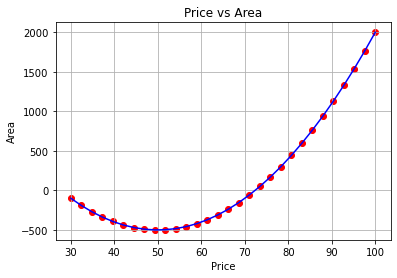

In [9]:
plt.scatter(x, y, color = 'r')
plt.plot(x, y_pred, color ='b')
plt.title('Price vs Area')
plt.xlabel('Price')
plt.ylabel('Area')
plt.grid()
plt.show()

# 2

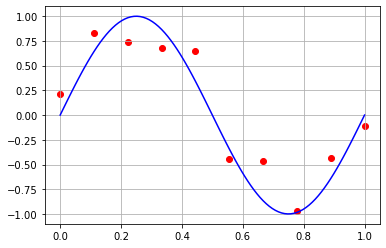

In [10]:
def gen_data(func, size, std):
    x = np.linspace(0, 1, size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = gen_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, color = "r")
plt.plot(x_test, y_test, color = "b")
plt.grid()
plt.show()

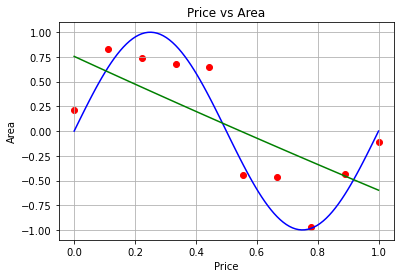

In [46]:
y_p = poly_pred(x_test, poly_fit_coef(x_train, y_train))

plt.scatter(x_train, y_train, color = 'r')
plt.plot(x_test, y_test, color ='b')
plt.plot(x_test, y_p, color ='g')
plt.title('Price vs Area')
plt.xlabel('Price')
plt.ylabel('Area')
plt.grid()
plt.show()

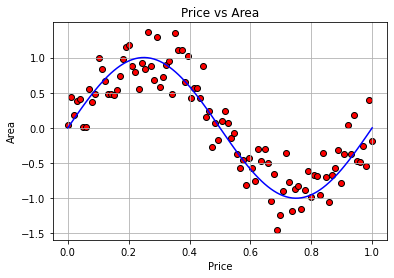

In [50]:
x_train, y_train = gen_data(func, 100, 0.25)
plt.scatter(x_train, y_train, color = 'r', edgecolor = 'k')
plt.plot(x_test, y_test, color ='b')
plt.title('Price vs Area')
plt.xlabel('Price')
plt.ylabel('Area')
plt.grid()
plt.show()

In [52]:
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
        
    def fit( self, X, Y ) :
        self.m, self.n = X.shape       
        self.W = np.zeros( self.n )
        self.b = 0        
        self.X = X        
        self.Y = Y
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
    
    def update_weights( self ) :           
        Y_pred = self.predict( self.X ) 
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m  
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self

    def predict( self, X ) :    
        return X.dot( self.W ) + self.b